<a href="https://colab.research.google.com/github/enino84/Data_Visualization/blob/main/GIC_05022022_MAPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Folium + Machine Learning**

1. Crear mapas empleando Open Street Map + información de los dataframes (ubicación de los clientes)

2. Construir modelos de Machine Learning (aprendizaje supervisado)

In [ ]:
import pandas as pd

In [ ]:
df_clientes = pd.read_csv('Clientes.csv')

In [ ]:
df_clientes.head(3)

,index,Codigo,Nombre,Fecha,Sexo,Trabajo,Compañia,Latitud,Longitud,Tipo Cliente,Riesgo Cliente,Salario,Formación,Score Cliente
0,0,0,Jillian Russo,2003-10-05,F,Insurance claims handler,White Ltd,10.969795,-74.783629,CLIENTE PLATA,RIESGO BAJO,1.652833,1.525181,62.283745
1,1,1,Amy Mason,2005-07-18,M,"Teacher, early years/pre","Moore, Payne and Martin",10.967343,-74.778423,CLIENTE PLATA,RIESGO BAJO,2.062139,2.369680,91.711777
2,2,2,Christopher Hernandez,1992-11-26,M,Data processing manager,Sheppard-Carter,10.989181,-74.793520,CLIENTE REGULAR,RIESGO ALTO,0.924423,1.337572,49.371379


# *Folium*

Imagen tomada de https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.portaleducativo.net%2Fquinto-basico%2F686%2FLatitud-y-longitud&psig=AOvVaw1HeIMYyAW0KNZSCB5ItM-o&ust=1644158661188000&source=images&cd=vfe&ved=0CAwQjhxqFwoTCPDY-7rm6PUCFQAAAAAdAAAAABAD

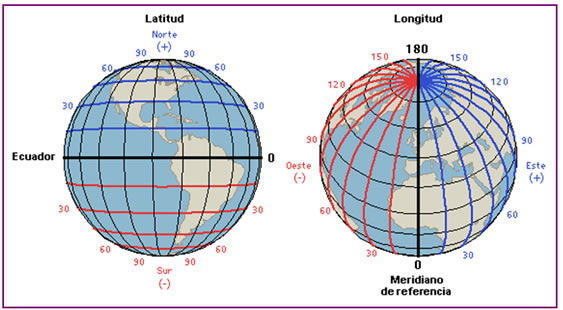

In [ ]:
import folium as fl

# *1. Crear un mapa*

In [ ]:
df_clientes.head(1)

,index,Codigo,Nombre,Fecha,Sexo,Trabajo,Compañia,Latitud,Longitud,Tipo Cliente,Riesgo Cliente,Salario,Formación,Score Cliente
0,0,0,Jillian Russo,2003-10-05,F,Insurance claims handler,White Ltd,10.969795,-74.783629,CLIENTE PLATA,RIESGO BAJO,1.652833,1.525181,62.283745


In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
m

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15, tiles='Stamen Terrain')
m

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15, tiles='Stamen Toner')
m

# *Markers*

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
fl.Marker(location=[10.969795, -74.783629]).add_to(m)
m

## *Marker + popup (descripción)*

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
fl.Marker(location=[10.969795, -74.783629], popup='Nombre del Cliente').add_to(m)
m

## *Iconos*

https://fontawesome.com/v5.15/icons?d=gallery&p=2

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
icono = fl.Icon(color='red', icon='car', prefix='fa')
fl.Marker(location=[10.969795, -74.783629], icon=icono, popup='Nombre del Cliente').add_to(m)
m

In [ ]:
numero_de_clientes = df_clientes.shape[0]

In [ ]:
df_clientes.iloc[0]['Longitud']

-74.78362870415506

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
for i in range(0, numero_de_clientes):
  cliente = df_clientes.iloc[i]
  fl.Marker(location=[cliente['Latitud'], cliente['Longitud']], 
            popup=cliente['Nombre']).add_to(m);
m

# `HeatMap`

In [ ]:
from folium.plugins import HeatMap

In [ ]:
latlon = df_clientes[['Latitud','Longitud']].values;

In [ ]:
data_map = latlon.tolist();

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
HeatMap(data_map).add_to(m)
m

In [ ]:
m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)
HeatMap(data_map).add_to(fl.FeatureGroup(name='Clientes Barranquilla').add_to(m));
fl.LayerControl().add_to(m)
m

In [ ]:
riesgo_bajo = df_clientes['Riesgo Cliente']=='RIESGO BAJO';
riesgo_alto = df_clientes['Riesgo Cliente']=='RIESGO ALTO';
df_riesgo_bajo = df_clientes[riesgo_bajo];
df_riesgo_alto = df_clientes[riesgo_alto];

latlon_bajo = df_riesgo_bajo[['Latitud','Longitud']].values.tolist();
latlon_alto = df_riesgo_alto[['Latitud','Longitud']].values.tolist();

m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)

HeatMap(latlon_bajo).add_to(fl.FeatureGroup(name='Clientes Riesgo Bajo').add_to(m));
HeatMap(latlon_alto).add_to(fl.FeatureGroup(name='Clientes Riesgo Alto').add_to(m));
fl.LayerControl().add_to(m)
m

# *Manejo de radius*

In [ ]:
riesgo_bajo = df_clientes['Riesgo Cliente']=='RIESGO BAJO';
riesgo_alto = df_clientes['Riesgo Cliente']=='RIESGO ALTO';
df_riesgo_bajo = df_clientes[riesgo_bajo];
df_riesgo_alto = df_clientes[riesgo_alto];

latlon_bajo = df_riesgo_bajo[['Latitud','Longitud']].values.tolist();
latlon_alto = df_riesgo_alto[['Latitud','Longitud']].values.tolist();

m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)

HeatMap(data=latlon_bajo, radius=12).add_to(fl.FeatureGroup(name='Clientes Riesgo Bajo').add_to(m));
HeatMap(data=latlon_alto, radius=12).add_to(fl.FeatureGroup(name='Clientes Riesgo Alto').add_to(m));
fl.LayerControl().add_to(m)
m

In [ ]:
riesgo_bajo = df_clientes['Riesgo Cliente']=='RIESGO BAJO';
riesgo_alto = df_clientes['Riesgo Cliente']=='RIESGO ALTO';
df_riesgo_bajo = df_clientes[riesgo_bajo];
df_riesgo_alto = df_clientes[riesgo_alto];

latlon_bajo = df_riesgo_bajo[['Latitud','Longitud']].values.tolist();
latlon_alto = df_riesgo_alto[['Latitud','Longitud']].values.tolist();

m = fl.Map(location=[10.969795, -74.783629], zoom_start=15)

HeatMap(data=latlon_bajo, radius=12).add_to(fl.FeatureGroup(name='Clientes Riesgo Bajo').add_to(m));
HeatMap(data=latlon_alto, radius=12).add_to(fl.FeatureGroup(name='Clientes Riesgo Alto').add_to(m));
fl.LayerControl().add_to(m)
m.save('RiesgosClientes.html')

# *Nominatim*

https://nominatim.org/

In [ ]:
import geopy
from geopy.geocoders import Nominatim

Query to https://www.openstreetmap.org/#map=19/11.00665/-74.82565

In [ ]:
geolocator = Nominatim(); #OpenStreetMap

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
uninorte = geolocator.geocode('Universidad del Norte, Barranquilla, Colombia')

In [ ]:
uninorte.latitude

11.01917765

In [ ]:
uninorte.longitude

-74.85082275239031

In [ ]:
m = fl.Map(location=[uninorte.latitude, uninorte.longitude], zoom_start=10);
fl.Marker(location=[uninorte.latitude, uninorte.longitude]).add_to(m);
m